Summary:
---
This notebook explains the analysis of a Heart Dataset, where we have about 303 subjects both Male and Female of varying ages. We look at 14 variables where they have different traits and a target variable that classifies if they have a high or low risk of heart disease. Then we are trying to analyze the data and see what significant factors are most important in flagging a person as a high risk patient for heart disease. In this document below i have explained my thinking process of how to start an analysis and try to dig out the reasons that classifies the subjects into two categories.

# Loading Libraries

In [1]:
import numpy as np
import os
import pandas as pd
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data Set

In [2]:
# Heart disease data loading:
path="/Users/mianmuhammadibrahim/Downloads/Statistical-Analysis-of-Heart-Disease-Dataset-master/heart.csv"

# Loading the data:
data=pd.read_csv(path)

# Top 5 Rows of the Dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Set Description

In the original dataset description from https://archive.ics.uci.edu/dataset/45/heart+disease, there are some details that are not coherent with the data set

Below is the description of the dataset 

-> age: The person's age in years

-> sex: The person's sex (1 = male, 0 = female)

-> cp: chest pain type
-- Value 0: asymptomatic
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: typical angina

In the original dataset description, Values are from 1-4 which is wrong. After making the correct changes, the labels are shown above

-> trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

-> chol: The person's cholesterol measurement in mg/dl

-> fbs: The person's fasting blood sugar (> 120 mg/dl) 
-- 1 = true 
-- 0 = false
 
-> restecg: resting electrocardiographic results
-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
-- Value 1: normal
-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-> thalach: The person's maximum heart rate achieved

-> exang: Exercise induced angina 
-- 1 = yes 
-- 0 = no

-> oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

 
-> slope: the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping

-> ca: The number of major vessels (0-3)
 
-> thal (Description provided in the datasource is  inorrect, the correct interpretation is written below)
Results of the blood flow observed via the radioactive dye.
 
Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)

This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.
 
-> target (THE most important feature): 0 = disease, 1 = no disease

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

# Cleaning Data Set

We can see that in the in the dataset

-> There is no ca=4 in the dataset so we will be dropping these rows
-> thal =0 is NULL in our dataset

In [3]:
data_1 = data[data['ca'] != 4]

In [4]:
data_1 = data_1[data_1['thal'] != 0]

In [5]:
# Feature Engineering, created a categorical age feature that gives ranges of different ages.

data_1['agebin'] = pd.cut(data_1['age'], bins=[29,40,55,77],include_lowest=True,labels=('young','middle','elderly'))

In [ ]:
data_1.describe()

In [ ]:
data_1.info()

We have cleaned the data from 303 to 296 Rows 

# Correlation between Variables

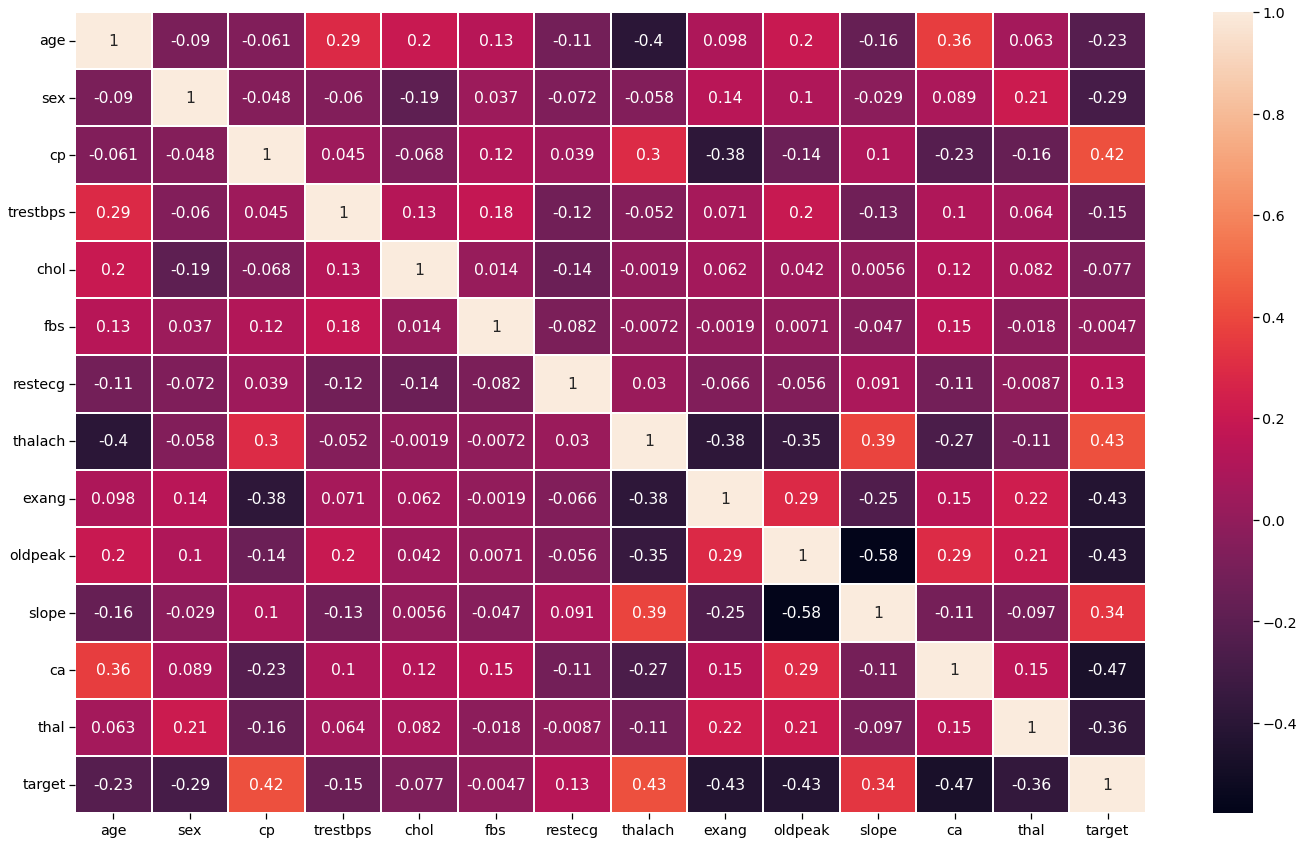

In [38]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data_1.corr(),annot=True,linewidth =2)
plt.tight_layout()

Correlation indicates how the features are related to each other or to the target variable. The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable) Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.


Correlation shows whether the characteristics are related to each other or to the target variable. Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased). From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. Medical emergency is a heart attack. A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain.

# Data Visulizations

In [6]:
data_2=data_1.copy()

In [7]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
data_2['sex'] = data_1['sex'].apply(chng)

In [8]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
data_2['target'] = data_1['target'].apply(chng2)

In [9]:
def chng3(cp):
    if cp == 0:
        return 'Asymptomatic'
    elif cp == 1:
        return 'Atypical angina'
    elif cp == 2:
        return 'Non-anginal pain'
    elif cp == 3:
        return 'typical angina'
    else:
        return 'Null'
    
data_2['cp'] = data_1['cp'].apply(chng3)

In [10]:
def chng4(thal):
    if thal == 1:
        return 'Fixed Defect'
    elif thal == 2:
        return 'Normal blood flow'
    elif thal == 3:
        return 'Reversible Defect'
    else:
        return 'Null'
    
data_2['thal'] = data_1['thal'].apply(chng4)

In [11]:
def chng5(slope):
    if slope == 0:
        return 'Downsloping'
    elif slope == 1:
        return 'Flat'
    elif slope == 2:
        return 'Upsloping'
    else:
        return 'Null'
    
data_2['slope'] = data_1['slope'].apply(chng5)

In [12]:
def chng6(exang):
    if exang == 1:
        return 'Yes'
    else:
        return 'no'
    
data_2['exang'] = data_1['exang'].apply(chng6)

## 1. Countplots

Text(0.5, 1.0, 'Gender v/s target\n')

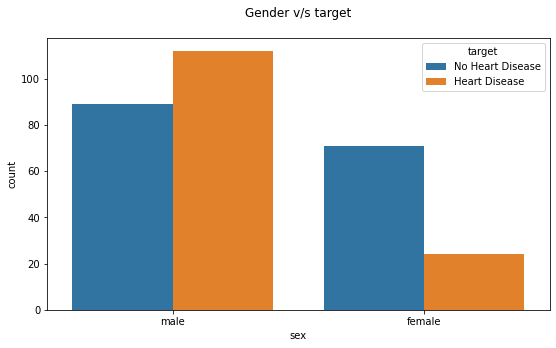

In [19]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(data= data_2, x='sex',hue='target')
plt.title('Gender v/s target\n')

According to this Cleveland dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women. Sudden Heart Attacks are experienced by men between 70% — 89%. Woman may experience a heart attack with no chest pressure at all, they usually experience nausea or vomiting which are often confused with acid reflux or the flu.

Text(0.5, 1.0, 'Chestpain v/s target\n')

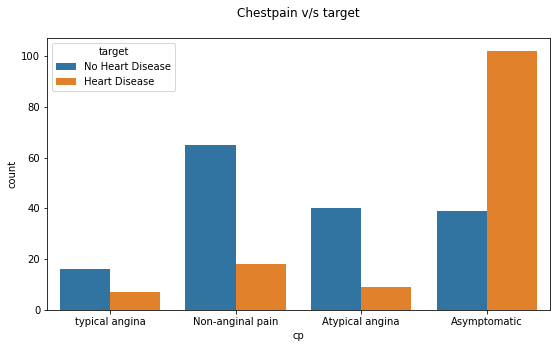

In [17]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(data= data_2, x='cp',hue='target')
plt.title('Chestpain v/s target\n')

There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. Most of the Heart Disease patients are found to have asymptomatic chest pain. These group of people might show atypical symptoms like indigestion, flu or a strained chest muscle. A asymptomatic attack, like any heart attack, involves, blockage of blood flow to your heart and possible damage to the heart muscle. The risk factors for asymptomatic heart attacks are same as those with heart symptoms. These factors include:

· Age

· Diabetes

· Excess weight

· Family History of Heart Disease

· High Blood Pressure

· High cholesterol

· Lack of exercise

· Prior Heart attack

· Tobacco use

Asymptomatic Heart attack puts you at a greater risk of having another heart attack which could be deadly. Having another heart attack also increases your risk of complications, such as heart failure. There are no test to determine your potential for asymptomatic heart attack. The only way to tell If you had asymptomatic attack is by an electrocardiogram or echocardiogram. These tests can reveal changes that signal a heart attack

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(data= data_2, x='sex',hue='thal')
plt.title('Thalsamia v/s Sex \n')

The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types , dilated type, with left ventricular dilatation and impaired contractility and a restrictive pheno type, with restrictive left ventricular feeling , pulmonary hyper tension and right heart failure. Heart problems, congestive heart failures and abnormal heart rhythms can be associated with severe thalassemia.

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(data= data_2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(data= data_2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

## 2. Distribution Plots

In [ ]:
sns.displot(data=data_2[data_2['target']=='Heart Disease'],x='age',kde=True,bins=20,height=10,aspect=1.5,hue='sex')
plt.title('Age of Heart Diseased Patients\n')

Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60. But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.

In [ ]:
sns.displot(data=data_2[data_2['target']=='Heart Disease'],x='chol',kde=True,bins=20,height=10,aspect=1.5,hue='sex')
plt.title('Chol of Heart Diseased Patients\n')

Total cholesterol

LDL — ‘bad cholesterol”

HDL — ‘good cholesterol”

In adults, the total cholesterol levels are considered desirable less than 200 milligram per decilitre ( mg / dL). Borderlines are considered to be high between 200 to 239 mg / dL and 240 mg / dL and above. LDL should contain less than 100 mg / dL of cholesterol. 100 mg / dl rates for individuals without any health issue are appropriate but may be more relevant for those with cardiac problems or risk factors for heart disease. The levels are borderline moderate between 130 and 159 mg / dL and moderate between 160 and 189 mg / dL. The reading is very high at or above 190 mg / dL. Levels of HDL are to be maintained higher. The risk factor for cardiovascular diseases is called a reading less than 40 mg / dL. Borderline low is considered to be between 41 mg / dL and 59 mg / dL. The HDL level can be measured with a maximum of 60 mg / dL.

## 3. Pie Charts

<AxesSubplot:title={'center':'Heart Disease by Age Group'}, ylabel='None'>

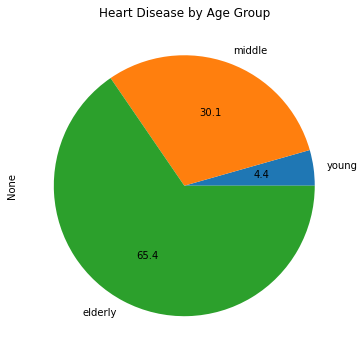

In [13]:
data_2[data_2['target']=='Heart Disease'].groupby(['agebin']).size().plot(kind='pie',autopct='%.1f',title='Heart Disease by Age Group',figsize=(6, 6))

<AxesSubplot:title={'center':'Heart Disease by Age Group - Male'}, ylabel='None'>

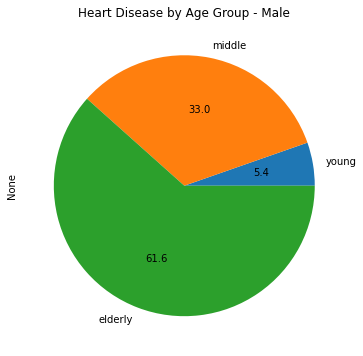

In [14]:
data_2[(data_2['target']=='Heart Disease')& (data_2['sex']=='male')].groupby('agebin').size().plot(kind='pie', autopct='%.1f',title='Heart Disease by Age Group - Male',figsize=(6, 6))

<AxesSubplot:title={'center':'Heart Disease by Age Group - Female'}, ylabel='None'>

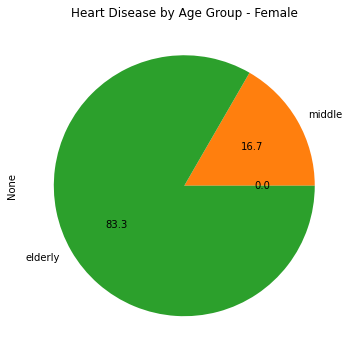

In [15]:
data_2[(data_2['target']=='Heart Disease')& (data_2['sex']=='female')].groupby('agebin').size().plot(kind='pie', autopct='%.1f',title='Heart Disease by Age Group - Female',figsize=(6, 6))

Looking at the Pie charts, we can see that the age group of 55-77 (Elderly Poulation) are more prone to get heart disease rather than young and middle age class population. This means that lifestyle of the population greatly affects heart disease in the future.

For the population who get heart disease in earlier ages, it can be due to defects in birth or because they were exposed to unhealthy environment which aggrevated their health condtions much quickly

## 4. Box Plots

There is some categories that can be discovered further from the findings above after we did separate analysis on different features to understand their effect. We'll dig into that but first let me just plot a statistic showing the values (more like distribution) of these four numeric indicators amongst the target (i.e High Risk and Low Risk Patients).

[Text(0.5, 1.0, 'Target vs Old Peak')]

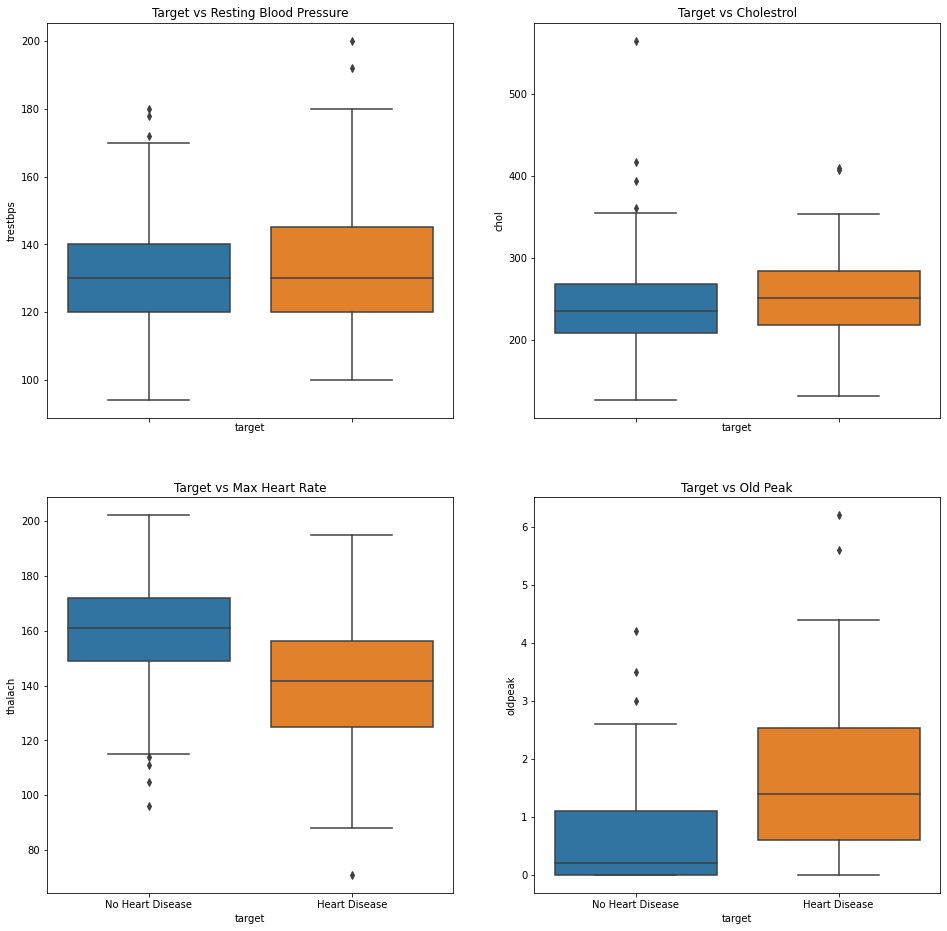

In [34]:
fig,axes=plt.subplots(2, 2, sharex=True, figsize=(16,16))

sns.boxplot(data=data_2,x='target',y='trestbps', ax=axes[0,0]).set(title='Target vs Resting Blood Pressure')
sns.boxplot(data=data_2,x='target',y='chol', ax=axes[0,1]).set(title='Target vs Cholestrol')
sns.boxplot(data=data_2,x='target',y='thalach', ax=axes[1,0]).set(title='Target vs Max Heart Rate')
sns.boxplot(data=data_2,x='target',y='oldpeak', ax=axes[1,1]).set(title='Target vs Old Peak')

General Traits that distinguishes High Risk Patients from Low Risk ones are that they have:

1.High Resting Blood Pressure

2.High Cholestrol levels

3.Low Max Heart Rate Achieved

4.High Old Peak

[Text(0.5, 1.0, 'Sex vs Old Peak')]

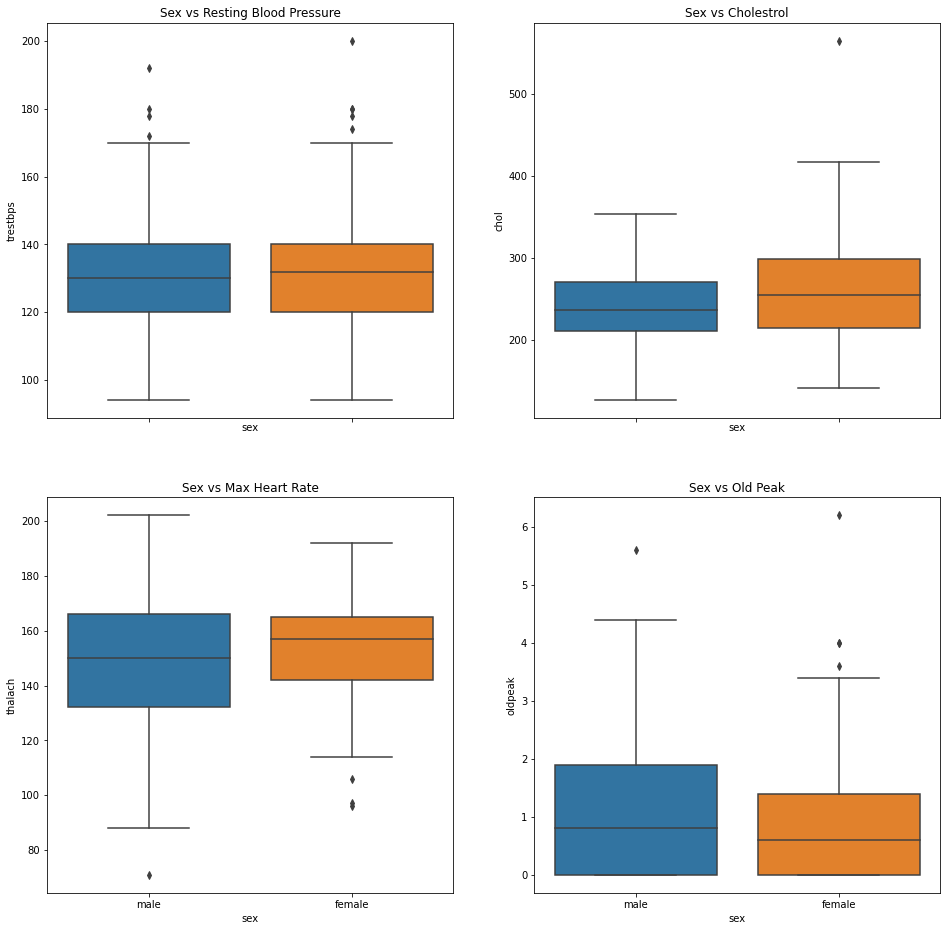

In [36]:
fig,axes=plt.subplots(2, 2, sharex=True, figsize=(16,16))

sns.boxplot(data=data_2,x='sex',y='trestbps', ax=axes[0,0]).set(title='Sex vs Resting Blood Pressure')
sns.boxplot(data=data_2,x='sex',y='chol', ax=axes[0,1]).set(title='Sex vs Cholestrol')
sns.boxplot(data=data_2,x='sex',y='thalach', ax=axes[1,0]).set(title='Sex vs Max Heart Rate')
sns.boxplot(data=data_2,x='sex',y='oldpeak', ax=axes[1,1]).set(title='Sex vs Old Peak')

## 5. Joint Plots

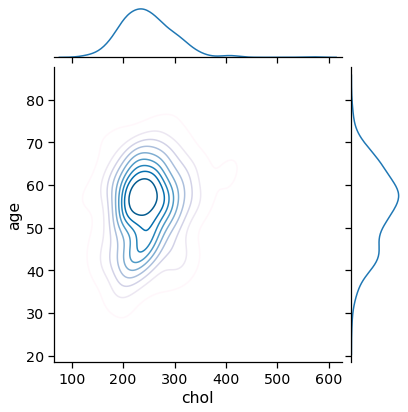

In [39]:
sns.jointplot(data=data_2,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

Joint plots in seaborn helps us to understand the trend seen among two features. As observed from the above plot we can see that most of the Heart diseased patients in their age of upper 50s or lower 60s tend to have Cholesterol between 200mg/dl to 300mg/dl.